In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk


nltk.download('stopwords')
nltk.download('wordnet')

# Load training and testing data
train_data = pd.read_csv("0000000000002747_training_twitter_x_y_train.csv")  
test_data = pd.read_csv("0000000000002747_test_twitter_x_test.csv")  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
train_data

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada),scheduled morning 2 day fact yesnot sure eveni...
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada),seeing worker time time going beyond love flyi...
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada),flew ord miami back great crew service leg thanks
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada),thats horse radish
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada),flight ord delayed air force one last flight s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,569934458364813313,neutral,American,NaN,Cottopanama85,NaN,0,@AmericanAir followback,NaN,2015-02-23 10:58:58 -0800,"ohio,panama",NaN,followback
10976,568564006329434113,positive,United,NaN,PaulBEsteves,NaN,0,@united thanks for the help. Wish the phone re...,NaN,2015-02-19 16:13:17 -0800,Brooklyn,Eastern Time (US & Canada),thanks help wish phone rep could accomidating
10977,569643648910028801,negative,US Airways,NaN,runfixsteve,NaN,0,@usairways the. Worst. Ever. #dca #customerser...,NaN,2015-02-22 15:43:24 -0800,"St. Augustine, Florida",NaN,worst ever dca customerservice
10978,568864981917110272,negative,US Airways,NaN,CLChicosky,NaN,0,@nrhodes85: look! Another apology. DO NOT FLY ...,NaN,2015-02-20 12:09:15 -0800,NaN,NaN,look another apology fly


In [12]:
test_data

,tweet_id,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text
0,569682010270101504,American,NaN,zsalim03,NaN,0,@AmericanAir In car gng to DFW. Pulled over 1h...,NaN,2015-02-22 18:15:50 -0800,Texas,Central Time (US & Canada),car gng dfw pulled 1hr ago icy road onhold aa ...
1,569608307184242688,American,NaN,sa_craig,NaN,0,"@AmericanAir after all, the plane didn’t land ...",NaN,2015-02-22 13:22:57 -0800,"College Station, TX",Central Time (US & Canada),plane didnt land identical worse condition grk...
2,567879304593408001,Southwest,NaN,DanaChristos,NaN,1,@SouthwestAir can't believe how many paying cu...,NaN,2015-02-17 18:52:31 -0800,CT,Eastern Time (US & Canada),cant believe many paying customer left high dr...
3,569757651539660801,US Airways,NaN,rossj987,NaN,0,@USAirways I can legitimately say that I would...,NaN,2015-02-22 23:16:24 -0800,"Washington, D.C.",Eastern Time (US & Canada),legitimately say would rather driven cross cou...
4,569900705852608513,American,NaN,tranpham18,NaN,0,@AmericanAir still no response from AA. great ...,NaN,2015-02-23 08:44:51 -0800,New York City,Eastern Time (US & Canada),still response aa great job guy
...,...,...,...,...,...,...,...,...,...,...,...,...
3655,570304244001193984,US Airways,NaN,Anthony_Scerri,NaN,0,@USAirways Been stuck for 40+ minutes due to l...,NaN,2015-02-24 11:28:22 -0800,"Astoria, NY",Quito,stuck 40 minute due lavatory issue beverage sn...
3656,567847737061941249,US Airways,NaN,mttdprkr,NaN,0,@USAirways 4 hours... 4 hours... FOUR HOURS. ...,NaN,2015-02-17 16:47:05 -0800,"Vancouver, WA",Pacific Time (US & Canada),4 hour 4 hour four hour like joke
3657,567823564167192576,Virgin America,NaN,miaerolinea,NaN,1,Nice RT @VirginAmerica: The man of steel might...,NaN,2015-02-17 15:11:02 -0800,Worldwide,Caracas,nice rt man steel might faster wifi saying sci...
3658,570273819287531520,American,NaN,GoldensPleasure,NaN,0,@AmericanAir Aww Thanks AA..DFW was on GMA up ...,NaN,2015-02-24 09:27:28 -0800,East Coast CT.,Central Time (US & Canada),aww thanks aadfw gma amso understand btw aa ai...


In [4]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [5]:
# Define text preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove hashtags and mentions
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase text
    tokens = text.split()  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return " ".join(tokens)

# Apply preprocessing
train_data['cleaned_text'] = train_data['text'].apply(preprocess_text)
test_data['cleaned_text'] = test_data['text'].apply(preprocess_text)

In [17]:
train_data['cleaned_text']

0        scheduled morning 2 day fact yesnot sure eveni...
1        seeing worker time time going beyond love flyi...
2        flew ord miami back great crew service leg thanks
3                                       thats horse radish
4        flight ord delayed air force one last flight s...
                               ...                        
10975                                           followback
10976        thanks help wish phone rep could accomidating
10977                       worst ever dca customerservice
10978                             look another apology fly
10979    far worst airline 4 plane delay 1 round trip f...
Name: cleaned_text, Length: 10980, dtype: object

In [18]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features

# Fit and transform on training data, then transform on test data
X_train_tfidf = tfidf.fit_transform(train_data['cleaned_text'])
X_test_tfidf = tfidf.transform(test_data['cleaned_text'])
y_train = train_data['airline_sentiment']  # Target variable

In [19]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 89910 stored elements and shape (10980, 5000)>

In [7]:
# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Split training data for validation (optional)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Train on the split training set
model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred_val = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Validation Accuracy: 76.87%


In [9]:
# Predict on test data
test_predictions = model.predict(X_test_tfidf)


In [10]:
# Save predictions to CSV as required format
pd.DataFrame(test_predictions).to_csv("test_predictions.csv", index=False, header=False)


Validation Accuracy: 76.87%


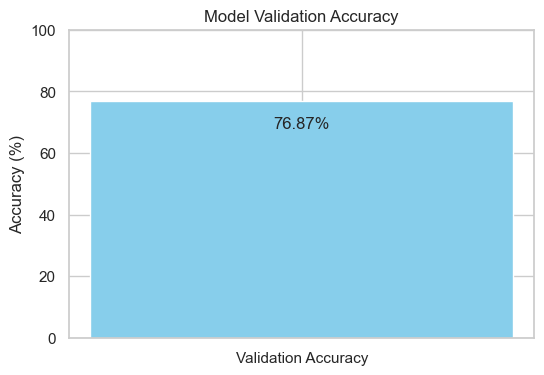

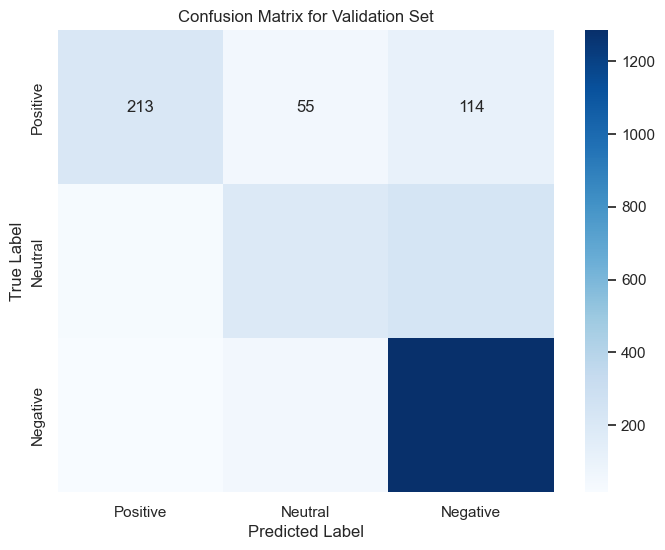

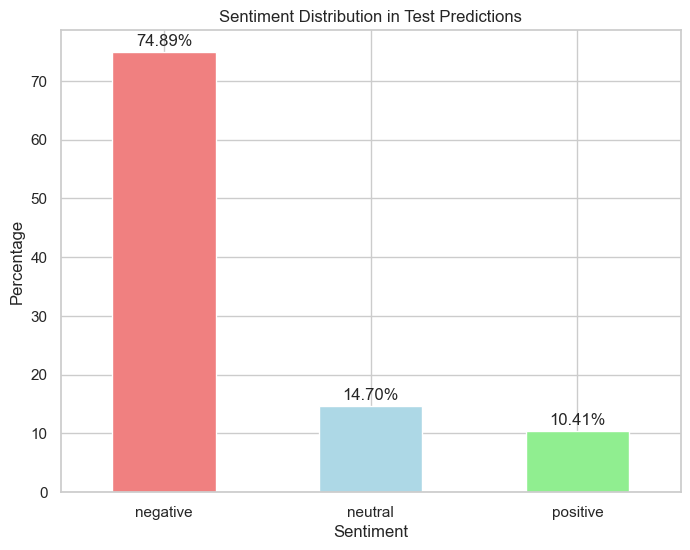

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (8, 6)})


def plot_accuracy(accuracy):
    plt.figure(figsize=(6, 4))
    plt.bar(['Validation Accuracy'], [accuracy * 100], color='skyblue')
    plt.ylim(0, 100)
    plt.ylabel('Accuracy (%)')
    plt.title('Model Validation Accuracy')
    plt.text(0, accuracy * 100 - 5, f"{accuracy * 100:.2f}%", ha='center', va='top', fontsize=12)
    plt.show()

def plot_confusion_matrix(y_val, y_pred_val):
    cm = confusion_matrix(y_val, y_pred_val, labels=["positive", "neutral", "negative"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for Validation Set')
    plt.show()


def plot_sentiment_distribution(predictions):
    sentiment_counts = pd.Series(predictions).value_counts(normalize=True) * 100
    sentiment_counts.plot(kind='bar', color=['lightcoral', 'lightblue', 'lightgreen'])
    plt.title('Sentiment Distribution in Test Predictions')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    for i, count in enumerate(sentiment_counts):
        plt.text(i, count + 1, f"{count:.2f}%", ha='center')
    plt.show()

y_pred_val = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


plot_accuracy(accuracy)
plot_confusion_matrix(y_val, y_pred_val)
plot_sentiment_distribution(test_predictions)
